In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [11]:
file_path = '/content/AirtrafficA4.csv'
data = pd.read_csv(file_path)
numeric_columns = [
    "TOTAL DEPARTURES", "HOURS FLOWN", "KILOMETRE FLOWN",
    "PASSENGERS CARRIED", "AVAILABLE SEAT KILOMETRE (IN THOUSAND)",
    " FREIGHT CARRIED (IN TONNE)", "MAIL CARRIED (IN TONNE)"]
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col].str.replace(",", "").str.strip(), errors='coerce')

In [13]:
data['MONTH'] = data['MONTH'].str.strip().str[:3]
data['date'] = pd.to_datetime(data['YEAR'].astype(str) + '-' + data['MONTH'], format='%Y-%b')
data.set_index('date', inplace=True)
data.sort_index(inplace=True)
passengers = data['PASSENGERS CARRIED']
train_data = passengers.loc[:'2023-08']
prediction_start = '2023-09'
prediction_end = '2024-08'

In [14]:
order = (1, 1, 1)
seasonal_order = (1, 1, 0, 12)

model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order,enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

forecast = model_fit.get_prediction(start=prediction_start, end=prediction_end)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
forecast_results = pd.DataFrame({'Date': forecast_mean.index,'Forecast': forecast_mean.values,})
forecast_results.reset_index(drop=True, inplace=True)
print(forecast_results)

         Date      Forecast
0  2023-09-01  7.937560e+06
1  2023-10-01  8.580085e+06
2  2023-11-01  8.955501e+06
3  2023-12-01  9.427414e+06
4  2024-01-01  8.307828e+06
5  2024-02-01  8.401339e+06
6  2024-03-01  9.477717e+06
7  2024-04-01  9.600495e+06
8  2024-05-01  1.019049e+07
9  2024-06-01  9.903538e+06
10 2024-07-01  9.663984e+06
11 2024-08-01  9.827821e+06


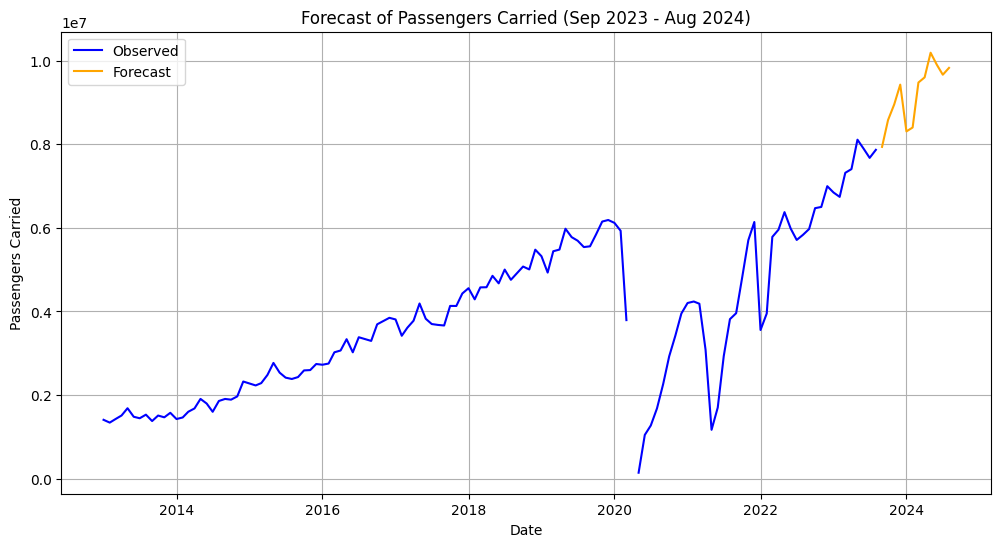

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(passengers.index, passengers.values, label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean.values, label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Passengers Carried')
plt.title('Forecast of Passengers Carried (Sep 2023 - Aug 2024)')
plt.legend()
plt.grid(True)
plt.show()